**SIMULATION DES FILES D'ATTENTE**

In [177]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

**Generation des dates d'arrivé et les temps de traitement**

afin de simuler les modeles de file d'attente *M/M/s* (*M/M/1* inclu) et *M/M/s/L*, nous allons dans un premier temps generer les des nombres aleatoire suivant la loi de POISSON pour les durrés inter arrivées et des nombres aleatoires suivant une loi exponentielle pour les durré de traitement, nous allons aussi initialiser une liste de serveurs (guichets) a vide.

In [178]:
S = 3
L = 10
lam = 2
mu = 5


Inter = np.random.poisson(2,100) #  contient les intervalles de temps entre les arrivée des clients 
Dates = np.cumsum(Inter) # en cumulant on retrouve les dates d'arrivées
Periods = np.random.exponential(5,100) #  contient les durrées de services

Liste des dates d'arrivées des clients :

In [179]:
print(Dates)

[  2   3   5   7   8  12  13  13  17  18  21  22  24  26  27  31  33  35
  36  39  41  42  43  46  46  47  50  52  55  58  61  63  67  69  71  73
  76  78  79  83  87  87  87  89  89  92  93 100 102 102 105 107 110 110
 110 116 119 123 123 128 133 136 138 141 145 147 149 153 153 155 159 160
 163 165 166 166 167 169 171 173 175 178 183 187 191 193 195 196 199 202
 203 204 206 209 209 212 214 216 218 220]


Liste des temps de traitement de chaque client :

In [180]:
print(Periods)

[ 1.45058465  3.61754861  2.17911455 17.87012541  1.22465733  1.38506093
  6.77636594  3.75821312  1.0200841   2.46597359  0.21092711  0.26887566
  2.39140853  4.09398304  2.10040414  0.82485456  0.56789546  6.91146786
  4.51428268  8.92455431  1.40307721  1.03842382  4.26898134  3.73470719
 18.07018543  7.60038763  6.87025136  1.67511446  1.44886903  0.97675821
  1.50100141  3.06677533  4.84631058  1.63486856 20.76047855  2.08347647
  2.98483767  2.97391082  1.63076755  5.06827116  7.60136518 17.3675592
  4.78645883  4.93878034  3.53861033 17.95529122  6.15528632  1.525195
 17.7001798   0.3551503   7.80146666  0.08545341  1.70254463  4.73533783
  5.34884376  2.11008479  5.13164765  1.31659096 13.96892375  5.6127672
  0.80227325 11.62397933  3.19021602  2.97271309  2.68221159  4.81091653
  6.72265019  6.84467364  3.90585325  9.68879785  2.07247796  2.64002709
  0.41394919  1.10220993  1.32320872  0.85640213  1.02432876  2.93594861
  2.13623556  0.67979855  1.5815535   2.54911296  1.553

les durrées séparant deux arrivées suivent une loi de POISSON de parametre (lam= 2 dans cet example) 

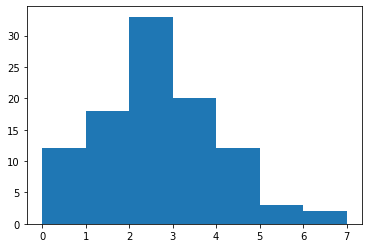

In [181]:
plt.hist(Inter,bins = 7)
plt.show()

L'histograme suivent peut etre vu comme le nnombre d'arrivées des client dans chaque instant t durant le déroulement de la simulation.

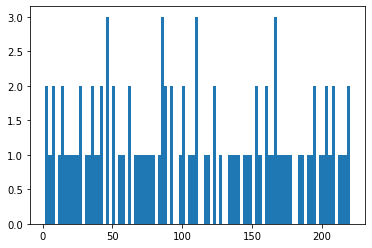

In [182]:
plt.hist(Dates,bins =100)
plt.show()

les temps de traitements suivent une loi expo de parametre (mu = 5 dans cet exemple)

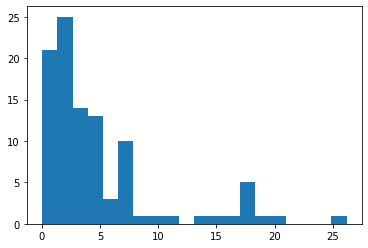

In [183]:
plt.hist(Periods,bins = 20)
plt.show()

**M/M/s**

Le systeme *M/M/s* est caracterisé par une capacité illimité de la file d'attente. 

In [184]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0] for i in range(S)] # S (=3) represente l'ensemble des serveurs du systeme (reste du temps a traiter + la date dans la quelle le traitement a commencer)
T = Dates
P = Periods
t=0
temps = 0
encours=1
while (len(T)>0): # tant que tout les client ne sont pas servi
  if (t>=T[0]): # si le prochain element est considéré pret (entré dans la file)  
    prd = [i for i,j in servers]
    temps = min(prd) # on trouve le prochain a faire sortir du systeme (traitement fini)
    t += temps # le temps de sont traitement s'ajoute a la variable t qui represente le deroulement pas a pas 
    i = prd.index(temps)
    encours = 0
    for s,l in enumerate(servers): # soustraire autres clients en phase de traitement le temps ecoulé 
      if (servers[s][0] -  temps < 0) : servers[s][0] =  0 ;  servers[s][1] =  0
      else : servers[s][0] -=  temps; encours += 1
    servers[i] = [P[0],t] # faire entrer le prochain dans la liste
    P = P[1:] # le suprimer de la liste P
    T = T[1:] # le suprimer de la liste T
  else: # sil n'est pas considéré comme pret on avance le temps jusqu'a ce quil soit pret et on corrige les durrée de traitement dans les serveurs
    t_prec = t
    t=T[0] 
    for s,l in enumerate(servers):
       if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
       else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in T: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)
  print('A l\'instant t = ',t)
  print(servers)
  print(T)
  print(P) 
  print()    

  


A l'instant t =  2
[[0, 0], [0, 0], [0, 0]]
[  2   3   5   7   8  12  13  13  17  18  21  22  24  26  27  31  33  35
  36  39  41  42  43  46  46  47  50  52  55  58  61  63  67  69  71  73
  76  78  79  83  87  87  87  89  89  92  93 100 102 102 105 107 110 110
 110 116 119 123 123 128 133 136 138 141 145 147 149 153 153 155 159 160
 163 165 166 166 167 169 171 173 175 178 183 187 191 193 195 196 199 202
 203 204 206 209 209 212 214 216 218 220]
[ 1.45058465  3.61754861  2.17911455 17.87012541  1.22465733  1.38506093
  6.77636594  3.75821312  1.0200841   2.46597359  0.21092711  0.26887566
  2.39140853  4.09398304  2.10040414  0.82485456  0.56789546  6.91146786
  4.51428268  8.92455431  1.40307721  1.03842382  4.26898134  3.73470719
 18.07018543  7.60038763  6.87025136  1.67511446  1.44886903  0.97675821
  1.50100141  3.06677533  4.84631058  1.63486856 20.76047855  2.08347647
  2.98483767  2.97391082  1.63076755  5.06827116  7.60136518 17.3675592
  4.78645883  4.93878034  3.53861033 17

Nombre de client dans le systeme durant tout le déroulement

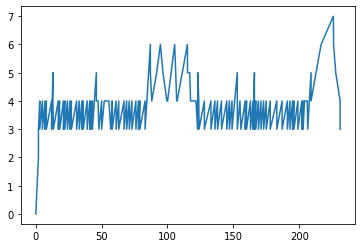

In [185]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

**M/M/1**

Soit dans le cas ou S = 1 :

In [186]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0]]
T = Dates
P = Periods
t=0
temps = 0
while (len(T)>0): # tant que tout les client ne sont pas servi
  if (t>=T[0]): # si le prochain element est considéré pret (entré dans la file)  
    prd = [i for i,j in servers]
    temps = min(prd) # on trouve le prochain a faire sortir du systeme (traitement fini)
    t += temps # le temps de sont traitement s'ajoute a la variable t qui represente le deroulement pas a pas 
    i = prd.index(temps)
    encours = 0
    for s,l in enumerate(servers): # soustraire autres clients en phase de traitement le temps ecoulé 
      if (servers[s][0] -  temps <= 0) : servers[s][0] =  0 ;  servers[s][1] =  0;
      else : servers[s][0] -=  temps ; encours += 1
    servers[i] = [P[0],t] # faire entrer le prochain dans la liste
    P = P[1:] # le suprimer de la liste P
    T = T[1:] # le suprimer de la liste T
  else: # sil n'est pas considéré comme pret on avance le temps jusqu'a ce quil soit pret et on corrige les durrée de traitement dans les serveurs
    t_prec = t
    t=T[0] 
    for s,l in enumerate(servers):
       if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
       else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in T: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)
  print('A l\'instant t = ',t)
  print(servers)
  print(T)
  print(P) 
  print() 

A l'instant t =  2
[[0, 0]]
[  2   3   5   7   8  12  13  13  17  18  21  22  24  26  27  31  33  35
  36  39  41  42  43  46  46  47  50  52  55  58  61  63  67  69  71  73
  76  78  79  83  87  87  87  89  89  92  93 100 102 102 105 107 110 110
 110 116 119 123 123 128 133 136 138 141 145 147 149 153 153 155 159 160
 163 165 166 166 167 169 171 173 175 178 183 187 191 193 195 196 199 202
 203 204 206 209 209 212 214 216 218 220]
[ 1.45058465  3.61754861  2.17911455 17.87012541  1.22465733  1.38506093
  6.77636594  3.75821312  1.0200841   2.46597359  0.21092711  0.26887566
  2.39140853  4.09398304  2.10040414  0.82485456  0.56789546  6.91146786
  4.51428268  8.92455431  1.40307721  1.03842382  4.26898134  3.73470719
 18.07018543  7.60038763  6.87025136  1.67511446  1.44886903  0.97675821
  1.50100141  3.06677533  4.84631058  1.63486856 20.76047855  2.08347647
  2.98483767  2.97391082  1.63076755  5.06827116  7.60136518 17.3675592
  4.78645883  4.93878034  3.53861033 17.95529122  6.155

Nombre de client dans le systeme durant tout le déroulement

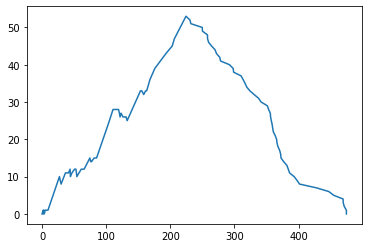

In [187]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

**Caracteristiques de la FA :** dans le cas ou s = 1

In [188]:
rau = lam / mu
ns = lam / (mu - lam)
nf = lam**2 / mu*(mu - lam)
ts = 1/(mu - lam)
tf = lam / mu*(mu - lam)
print(ns,nf,ts,tf)

0.6666666666666666 2.4000000000000004 0.3333333333333333 1.2000000000000002


**M/M/s/L**

Le systeme *M/M/s/L* est caracterisé par une capacité limité de la source, ie. la file d'attente est limité, les clients sont rejetés si la file est pleine.

In [197]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0] for i in range(S)] # S (=3) represente l'ensemble des serveurs du systeme (reste du temps a traiter + la date dans la quelle le traitement a commencer)
T = Dates
P = Periods
t=0
queue = [T[0]];T=T[1:]
temps = 0
while (len(T)>0) and (len(queue)>0) :
  if len(queue)<L:
    queue.append(T[0])
    T = T[1:]
  else:  
    if (t>=T[0]): T = T[1:]
    if (t>=queue[0]):
      prd = [i for i,j in servers]
      temps = min(prd)
      t += temps 
      i = prd.index(temps)
      encours=0
      for s,l in enumerate(servers):
        if (servers[s][0] -  temps < 0) : servers[s][0] =  0
        else : servers[s][0] -=  temps; encours+=1
      servers[i] = [P[0],t]
      P = P[1:]
      queue = queue[1:]
    else: 
      t_prec = t
      t=queue[0] 
      for s,l in enumerate(servers):
        if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
        else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in queue: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)
  print(t)
  print(servers)
  print(T)
  print(P)
  print(queue)

0
[[0, 0], [0, 0], [0, 0]]
[  5   7   8  12  13  13  17  18  21  22  24  26  27  31  33  35  36  39
  41  42  43  46  46  47  50  52  55  58  61  63  67  69  71  73  76  78
  79  83  87  87  87  89  89  92  93 100 102 102 105 107 110 110 110 116
 119 123 123 128 133 136 138 141 145 147 149 153 153 155 159 160 163 165
 166 166 167 169 171 173 175 178 183 187 191 193 195 196 199 202 203 204
 206 209 209 212 214 216 218 220]
[ 1.45058465  3.61754861  2.17911455 17.87012541  1.22465733  1.38506093
  6.77636594  3.75821312  1.0200841   2.46597359  0.21092711  0.26887566
  2.39140853  4.09398304  2.10040414  0.82485456  0.56789546  6.91146786
  4.51428268  8.92455431  1.40307721  1.03842382  4.26898134  3.73470719
 18.07018543  7.60038763  6.87025136  1.67511446  1.44886903  0.97675821
  1.50100141  3.06677533  4.84631058  1.63486856 20.76047855  2.08347647
  2.98483767  2.97391082  1.63076755  5.06827116  7.60136518 17.3675592
  4.78645883  4.93878034  3.53861033 17.95529122  6.15528632  1.

Nombre de client dans le systeme durant tout le déroulement

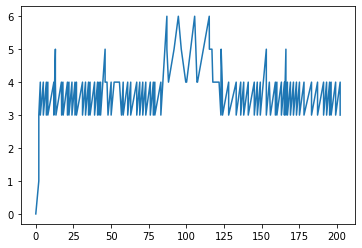

In [199]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

Soit dans le cas ou S = 1 et L = 10 :

In [203]:
Deroul = [[],[]] ; Deroul[0].append(0); Deroul[1].append(0) ; encours = 0 #liste uutilisé dans la visualisation
servers = [[0,0]]
T = Dates
P = Periods
t=0
queue = [T[0]]; T=T[1:]
temps = 0
while (len(T)>0) and (len(queue)>0) :
  if len(queue)<L:
    queue.append(T[0])
    T = T[1:]
  else:  
    if (t>=T[0]): T = T[1:]
    if (t>=queue[0]):
      prd = [i for i,j in servers]
      temps = min(prd)
      t += temps 
      i = prd.index(temps)
      encours = 0
      for s,l in enumerate(servers):
        if (servers[s][0] -  temps < 0) : servers[s][0] =  0
        else : servers[s][0] -=  temps; encours+=1
      servers[i] = [P[0],t]
      P = P[1:]
      queue = queue[1:]
    else: 
      t_prec = t
      t=queue[0] 
      for s,l in enumerate(servers):
        if (servers[s][0] - (t-t_prec) < 0) : servers[s][0] =  0
        else : servers[s][0] -=  (t-t_prec) 
  k=0
  for cl in queue: # Calculer le nombre de client en attente dans la file
    if (cl<=t) : k+=1
  Deroul[0].append(t);Deroul[1].append(k+encours)  
  print(t)
  print(servers)
  print(T)
  print(P)
  print(queue)

0
[[0, 0]]
[  5   7   8  12  13  13  17  18  21  22  24  26  27  31  33  35  36  39
  41  42  43  46  46  47  50  52  55  58  61  63  67  69  71  73  76  78
  79  83  87  87  87  89  89  92  93 100 102 102 105 107 110 110 110 116
 119 123 123 128 133 136 138 141 145 147 149 153 153 155 159 160 163 165
 166 166 167 169 171 173 175 178 183 187 191 193 195 196 199 202 203 204
 206 209 209 212 214 216 218 220]
[ 1.45058465  3.61754861  2.17911455 17.87012541  1.22465733  1.38506093
  6.77636594  3.75821312  1.0200841   2.46597359  0.21092711  0.26887566
  2.39140853  4.09398304  2.10040414  0.82485456  0.56789546  6.91146786
  4.51428268  8.92455431  1.40307721  1.03842382  4.26898134  3.73470719
 18.07018543  7.60038763  6.87025136  1.67511446  1.44886903  0.97675821
  1.50100141  3.06677533  4.84631058  1.63486856 20.76047855  2.08347647
  2.98483767  2.97391082  1.63076755  5.06827116  7.60136518 17.3675592
  4.78645883  4.93878034  3.53861033 17.95529122  6.15528632  1.525195
 17.70017

Nombre de client dans le systeme durant tout le déroulement

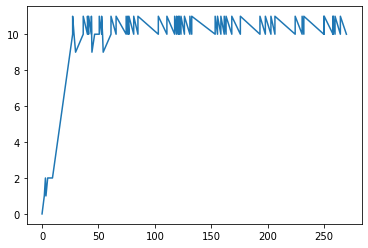

In [204]:
plt.plot(Deroul[0],Deroul[1])
plt.show()

**Caracteristiques de la FA :** cas M/M/1/L

In [192]:
rau = lam / mu
if (lam == mu):
  PL = 1/L+1
  ns = L/2
else:
  PL = ((1-mu)*(mu**L))/(1-mu**(L+1)) 
  ns = (mu/1-mu)-(( (L+1)*mu**(L+1)) / (1-mu**(L+1))) 


nf = ns - mu*(1-PL)
tf = nf/(lam*(1-PL))
ts = tf + 1/mu
print(ns,nf,ts,tf)

11.000000225280004 10.000000307200006 25.200002816000282 25.000002816000283
